<a href="https://colab.research.google.com/github/Bkankim/Competition/blob/main/%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C_%EC%97%B0%EC%8A%B5_salary_EDA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1 : 데이터 로드

In [2]:
import pandas as pd

# 데이터 불러오기
df = pd.read_csv("/content/sample_data/Salary_dataset.csv")

# 상위 5개 확인
print(df.head())

   Unnamed: 0  YearsExperience  Salary
0           0              1.2   39344
1           1              1.4   46206
2           2              1.6   37732
3           3              2.1   43526
4           4              2.3   39892


# Step 2 : EDA
>* Chek point
    1. 연차(Experience) 분포
        - 연차가 고르게 분포되어 있는지? (분산 biased)
        - 특정 연차 쏠림이 없는지? (편향 balanced)
    2. 연봉(Salary) 분포
        - 연봉 수준이 고르게 분포되어 있는지? (분산 biased)
        - 이상치가 없는지? (이상치 outlier)
    3. 연차 vs 연봉의 관계 (산점도)
        - 연차가 늘수록 급여가 올라가는 경향이 보이는지? (상관 관계)
        - 선형 관계인지, 아니면 비선형인지 시각적으로 판단
        (선형/비선형)
        - 이상치가 없는지? (이상치 outlier)
    4. 결측치 유무

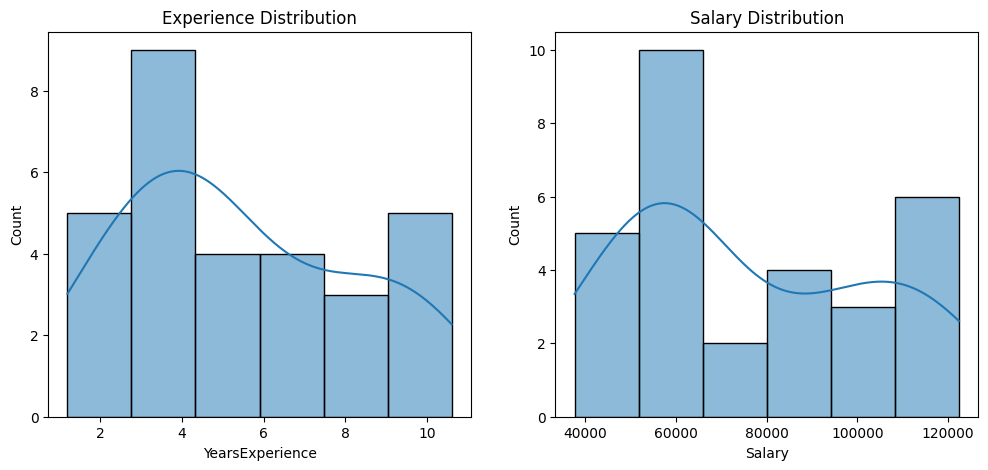

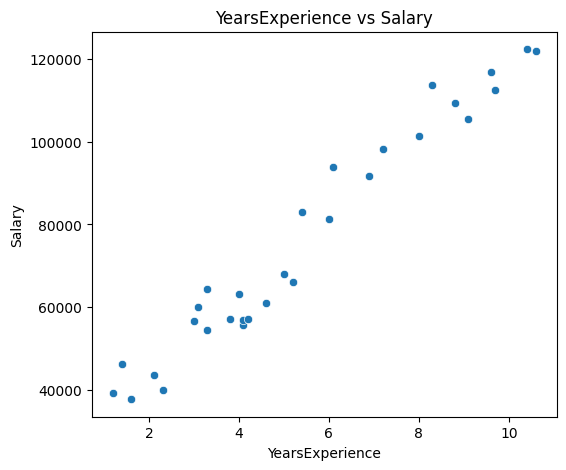

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 변수 분포
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['YearsExperience'], kde=True)
plt.title("Experience Distribution")

plt.subplot(1,2,2)
sns.histplot(df['Salary'], kde=True)
plt.title("Salary Distribution")
plt.show()

# 산점도
plt.figure(figsize=(6,5))
sns.scatterplot(x='YearsExperience', y='Salary', data=df)
plt.title("YearsExperience vs Salary")
plt.show()

# 결측치
print(df.isnull().sum())

# Step 3 전처리
>* 결측치 → 없는지 확인
    1. x, y → shape와 값 확인
        * x (30, 1) → 30개 샘플, 1개 피처
        * y (30, ) → 30개 샘플, 1차원 벡터
    2. x_scaled → 표준화된 값 확인
        * 표준화 (평균 0, 표준편차 1)

In [15]:
from sklearn.preprocessing import StandardScaler

# 컬럼별 결측치 개수 확인
print(f"* 결측치 확인\n{df.isnull().sum()}")

# 입력변수 X, 타겟 y
X = df[['YearsExperience']].values
y = df['Salary'].values

# 확인
print("\n* x, y 타겟 확인")
print("X shape:", X.shape)
print("y shape:", y.shape)
print("X preview:\n", X[:5])
print("y preview:\n", y[:5])

# 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 표준화 결과 확인
print("\n* 표준화 결과 확인")
print("X_scaled preview:\n", X_scaled[:5])

* 결측치 확인
Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

* x, y 타겟 확인
X shape: (30, 1)
y shape: (30,)
X preview:
 [[1.2]
 [1.4]
 [1.6]
 [2.1]
 [2.3]]
y preview:
 [39344 46206 37732 43526 39892]

* 표준화 결과 확인
X_scaled preview:
 [[-1.51005294]
 [-1.43837321]
 [-1.36669348]
 [-1.18749416]
 [-1.11581443]]


# Step 4 : 데이터 분할 (Train/Test Split)

> * shape
    1. train/test 데이터가 잘 분할되었는지
    2. 샘플 수가 이상하게 적거나 너무 많은지
* preview
    1. 값에 NaN이나 이상치가 새로 발생하지 않았는지
        * 결측치 존재시 nan / NA 출력됨
        * 만약, 결측치 존재하는대로 머신러닝 모델에 들어가면 ValueError 발생

In [17]:
from sklearn.model_selection import train_test_split

# 70:30 비율로 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# 분리 후 확인
print("* 데이터 분할 확인")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

print("\nX_train preview:\n", X_train[:5])
print("y_train preview:\n", y_train[:5])

* 데이터 분할 확인
X_train shape: (21, 1)
X_test shape: (9, 1)
y_train shape: (21,)
y_test shape: (9,)

X_train preview:
 [[-1.51005294]
 [-1.11581443]
 [-0.07645838]
 [-0.86493538]
 [-0.43485702]]
y_train preview:
 [39344 39892 66030 56643 57082]


# Step 5 : 모델 학습
>* 회귀계수(기울기)
    1. 경력이 1 표준단위 (2년) 증가하면 연봉이 얼마나 바뀌는지
* 절편
    1. 경력이 0일때의 연봉(모델상 해석, 실제로는 의미 없을 수도 있지만 참고)

In [19]:
from sklearn.linear_model import LinearRegression

# 선형회귀 모델 선언
model = LinearRegression()

# 학습
model.fit(X_train, y_train)

print("* 모델 학습 결과")
print(f"회귀계수 (slope): {model.coef_[0]:.4f}")
print(f"절편 (intercept): {model.intercept_:.2f}")

* 모델 학습 결과
회귀계수 (slope): 26057.8046
절편 (intercept): 75541.09


# Step 6 : 평가
>* RMSE / MAE 값
    1. 평균적으로 예측 오차가 얼마 정도 되는지
    2. 값이 너무 크면 모델 개선 필요
* 시각화
    1. 파란 점(실제)과 빨간 점(예측)이 가까이 모여있으면 잘 맞춘 것
    2. 괴리(오차)가 커 보이면 성능 개선 필요


>* RMAE : 오차 제곲의 평균에서 루트를 씌운값 → 큰 오차를 민감하게 보고 싶을 때
* MAE :  오차의 절대값 평균 → 모든 오차를 동일하게 (큰 오차에 둔함)

In [20]:
# 예측값
y_pred = model.predict(X_test)

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("* 성능 지표")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

* 성능 지표
RMSE: 6146.92
MAE: 5161.33


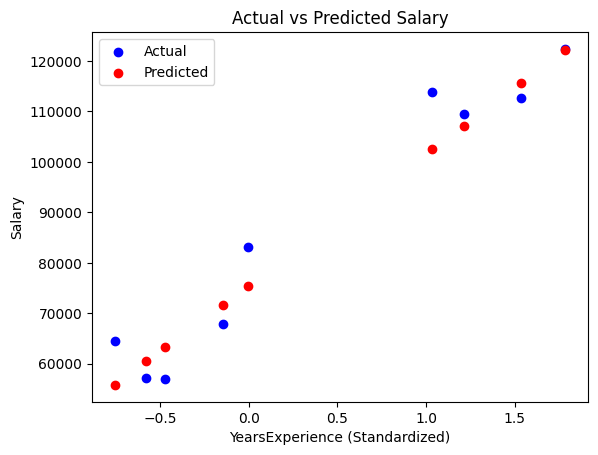

* 빨간점 = 예측값
* 파란점 = 실제값


In [27]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel("YearsExperience (Standardized)")
plt.ylabel("Salary")
plt.title("Actual vs Predicted Salary")
plt.legend()
plt.show()
print("* 빨간점 = 예측값")
print("* 파란점 = 실제값")

# Step 7 : 인사이트 및 결론
>* Step 1: 데이터 로드
    - 파일 확인

>* Step 2: EDA
    - YearExperience 분포: 1~10년 정도의 경력이 주로 포함되어 있었고, 데이터 편향은 크지 않았다.
    - Salary 분포: 40,000~100,000 정도로 분포하며, 큰 이상치는 보이지 않았다.
    - 산점도: 연차가 늘수록 연봉도 증가하는 선형적 관계가 눈으로도 확인되었다.
    - 결측치: 없음

>* Step 3: 전처리
    - 입력(X): YearExperience
    - 타겟(y): Salary
    - X에 대해 표준화(StandardScaler)를 적용
        - 평균 0, 표준편차 1의 스케일로 변환
    - 표준화된 값의 preview를 확인하여
        - -2~+2 정도의 값이 잘 나오는 것을 확인했고,
        - NaN이나 이상치는 없었다.

>* Step 4: 데이터 분할
    - 전체 30개 샘플 중 70:30으로 분할
        - train: 21개
        - test: 9개
    - 분할 후 shape과 preview 점검
        - 데이터가 잘 나뉘었는지 확인했고
        - 타겟 값의 분포도 train/test에 적절히 포함된 것을 확인

>* Step 5: 모델 학습
    - 선형회귀를 학습
    - 회귀계수(기울기):
        - YearExperience가 1 표준단위 증가할 때 평균적으로 연봉이 얼마나 증가하는지
    - 절편(intercept):
        - 표준화 기준, 평균 연차자의 예상 연봉 수준

>* Step 6: 모델 평가
    - RMSE / MAE
        - 연봉 평균 대비 몇 % 수준의 오차인지 확인
        - 모델의 예측력이 어느 정도 되는지 판단
    - 산점도 시각화
        - 실제값과 예측값이 전체적으로 일치하지만
        - 일부 경력이 낮거나 높은 샘플에서 오차가 발생하는 것을 관찰

>* Step 7: 인사이트 도출
    - 단순 선형회귀로도 연차와 연봉의 선형 관계를 설명 가능
    - 하지만 변수(feature)가 1개 뿐이므로
        - 실제 HR 분석에서는 직무, 직급, 지역, 산업군 등 추가 변수 필요
    - 현재 데이터의 적은 샘플(30개)은
        - 학습보다는 프로세스 실습 목적으로 충분
        - 실무 투입에는 데이터 확장이 필요

# 최종 결론
***“YearExperience는 연봉에 선형적인 영향을 준다” 는 가설을 단순 회귀 모델로 확인했다.***